### Theoretical cluster count covariances using TJPCov.
This notebook shows how to use TJPCov to calculate covariances, given a .sacc file.

We will
1. Read in an appropriate yaml file that specifies to do cluster count covariances
2. Instantiate a `CovarianceCalculator` 
3. Tell the calculator to calculate the covariances
4. Display the covariance / correlation coefficient
5. Save the covariance back to .sacc

In [2]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pyccl as ccl
import sacc
import pickle
from tjpcov.covariance_io import CovarianceIO
from tjpcov.covariance_calculator import CovarianceCalculator

The .yaml file contains the reference to the .sacc file - so specify which .sacc file you want to use there. You can also specify if you want to use MPI or not.

In [3]:
input_yml = './clusters/conf_covariance_clusters.yaml'
cc = CovarianceCalculator(input_yml)

`get_covariance` will calculate the covariance of all classes specified in the yaml file.  For this example we are only calculating the cluster count covariance.

`create_sacc_cov` will then save the covariance to a sacc file.

In [23]:
cov = cc.get_covariance()
sacc_with_cov = cc.create_sacc_cov(output='../tests/data/clusters/mock_clusters_with_cov.sacc', save_terms=False)

Computing independent covariance blocks
('clusters_0_0',) ('clusters_0_0',)
('clusters_0_0',) ('clusters_0_1',)
('clusters_0_0',) ('clusters_0_2',)
('clusters_0_0',) ('clusters_0_3',)
('clusters_0_0',) ('clusters_0_4',)
('clusters_0_0',) ('clusters_1_0',)
('clusters_0_0',) ('clusters_1_1',)
('clusters_0_0',) ('clusters_1_2',)
('clusters_0_0',) ('clusters_1_3',)
('clusters_0_0',) ('clusters_1_4',)
('clusters_0_0',) ('clusters_2_0',)
('clusters_0_0',) ('clusters_2_1',)
('clusters_0_0',) ('clusters_2_2',)
('clusters_0_0',) ('clusters_2_3',)
('clusters_0_0',) ('clusters_2_4',)
('clusters_0_0',) ('clusters_3_0',)
('clusters_0_0',) ('clusters_3_1',)
('clusters_0_0',) ('clusters_3_2',)
('clusters_0_0',) ('clusters_3_3',)
('clusters_0_0',) ('clusters_3_4',)
('clusters_0_1',) ('clusters_0_1',)
('clusters_0_1',) ('clusters_0_2',)
('clusters_0_1',) ('clusters_0_3',)
('clusters_0_1',) ('clusters_0_4',)
('clusters_0_1',) ('clusters_1_0',)
('clusters_0_1',) ('clusters_1_1',)
('clusters_0_1',) ('clus

In [19]:
cov_from_file = sacc_with_cov.covariance.covmat
correlation = np.corrcoef(sacc_with_cov.covariance.covmat)

That's it! Now you have a covariance matrix. 

Loading the pre-calculated covariance from pickle, we can now display it and save it to the .sacc file.

Text(0.5, 1.0, 'Covariance')

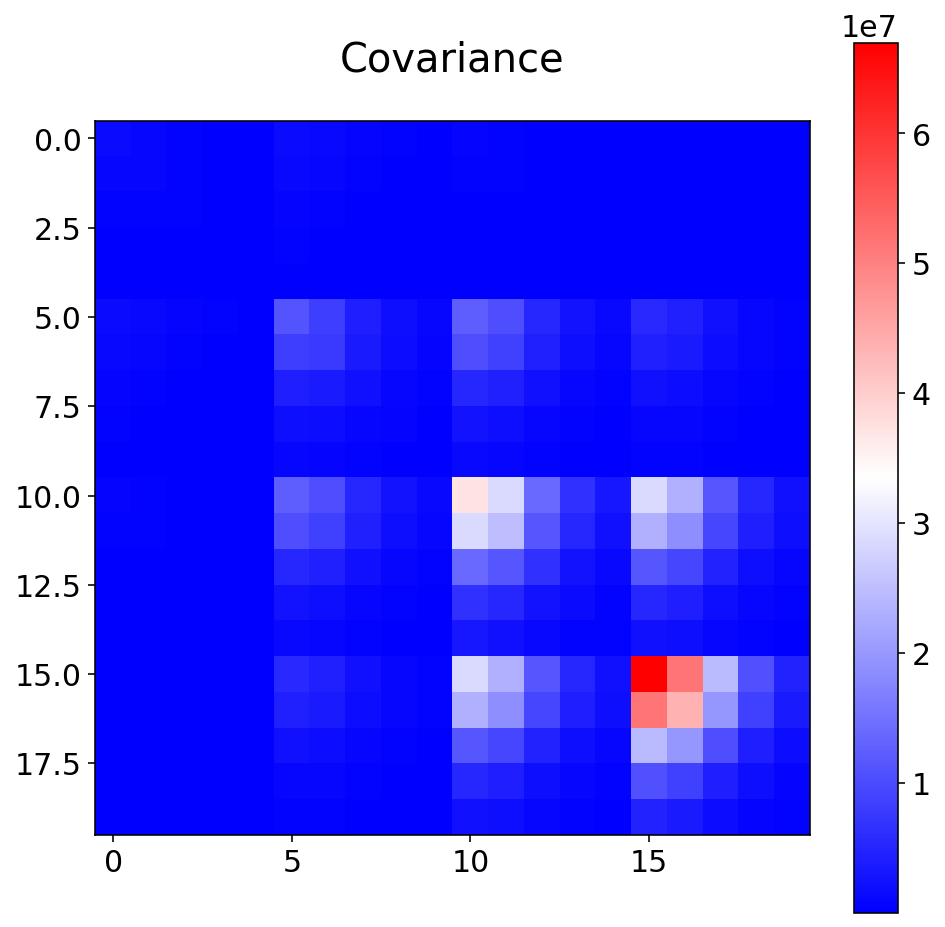

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(cov_from_file, cmap='bwr')
plt.colorbar()
plt.title('Covariance')

Text(0.5, 1.0, 'Correlation')

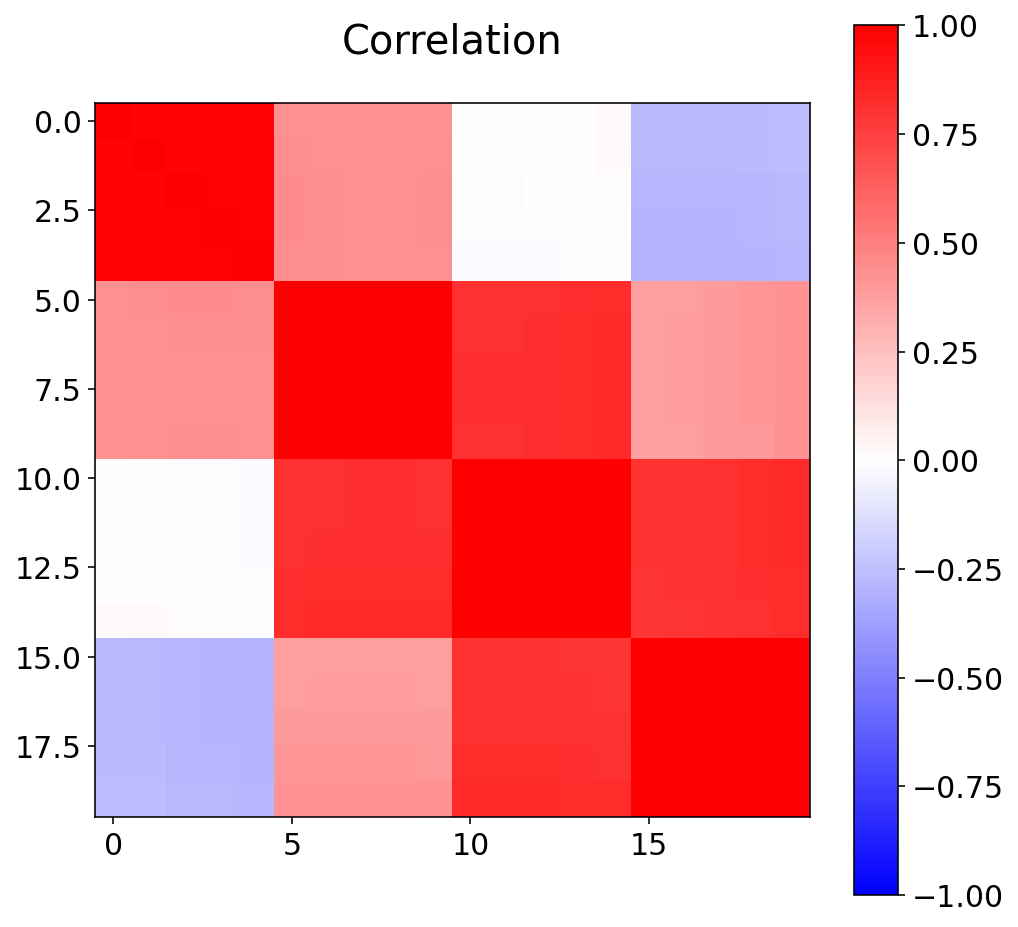

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(correlation, cmap='bwr', vmax=1, vmin=-1)

plt.colorbar()
plt.title('Correlation')